# Neural Networks: List 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import minimize

import sys
sys.path.insert(0, '../')
from continuous_hopfield import ContinuousHopifield
import hopfield

## Dataset

### Loading

In [2]:
a=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,-1,-1,1]])
b=np.array([[-1,-1,-1,-1,-1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,-1,-1,1,1]])
c=np.array([[1,-1,-1,-1,-1],[-1,1,1,1,1],[-1,1,1,1,1],[-1,1,1,1,1],[1,-1,-1,-1,-1]])
d=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
p5=np.array([[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1]])
p6=np.array([[1,-1,-1,-1,1],[-1,1,1,1,1],[1,-1,-1,-1,1],[1,1,1,1,-1],[1,-1,-1,-1,1]])
train_data = np.array([a, b, c, d, p5, p6])
t1=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[-1,-1,1,1,-1],[1,-1,-1,-1,1]])
t2=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,1,-1,1,1]])
t3=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,-1,1,-1,1],[1,1,1,1,1],[-1,-1,-1,1,1]])
t4=np.array([[-1,-1,-1,-1,-1],[-1,1,1,1,-1],[-1,1,-1,1,1],[-1,1,1,-1,1],[1,-1,-1,-1,-1]])
t5=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t6=np.array([[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,1,-1,1,1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t7=np.array([[-1,-1,-1,1,-1],[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,-1,1,1,-1],[1,1,1,-1,1]])
t8=np.array([[-1,1,1,1,-1],[-1,-1,1,1,-1],[1,1,-1,-1,1],[-1,1,1,1,-1],[-1,1,1,1,1]])
t9=np.array([[-1,-1,-1,-1,1],[1,1,1,1,1],[-1,1,1,1,1],[-1,1,-1,-1,1],[-1,-1,1,1,1]])
t10=np.array([[-1,-1,1,1,-1],[-1,1,1,1,1],[1,1,1,-1,1],[1,1,1,1,1],[1,1,-1,-1,1]])
t11=np.array([[-1,-1,1,1,1],[1,1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,-1,-1,1],[-1,1,1,1,-1]])
t12=np.array([[1,-1,1,-1,1],[-1,1,1,1,-1],[1,-1,1,1,1],[-1,-1,-1,1,1],[1,-1,-1,1,-1]])
t13=np.array([[1,1,1,1,-1],[1,-1,1,-1,1],[1,1,1,1,-1],[-1,-1,1,1,-1],[-1,1,1,-1,1]])
test = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13])
full = np.array([a, b, c, d, p5, p6,t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13])

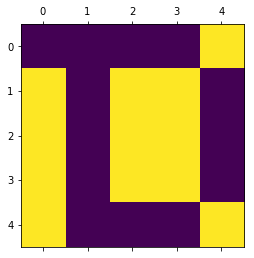

In [3]:
plt.matshow(train_data[0])

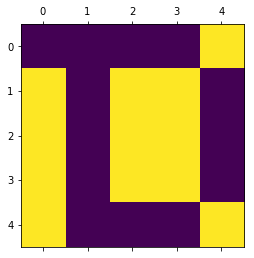

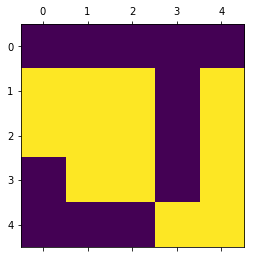

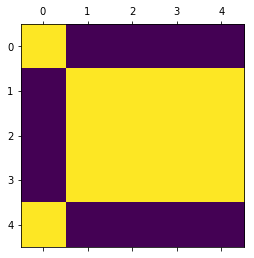

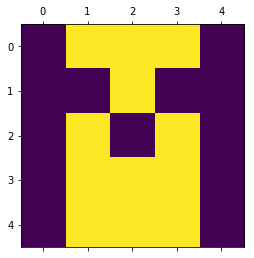

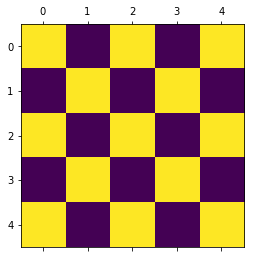

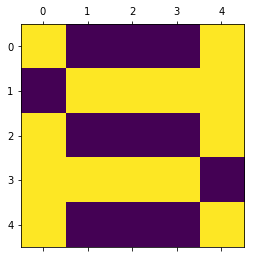

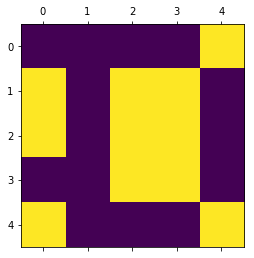

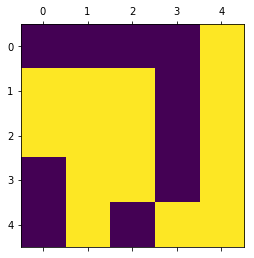

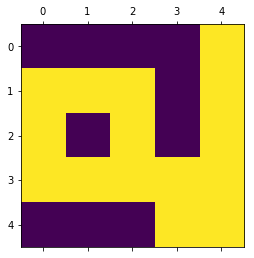

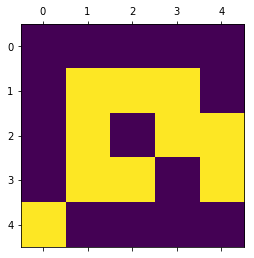

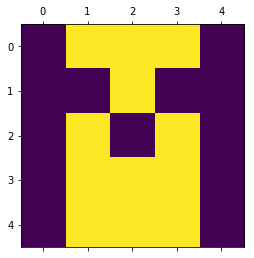

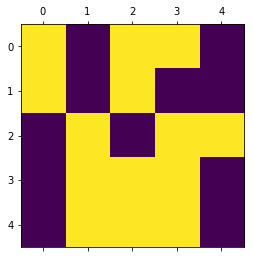

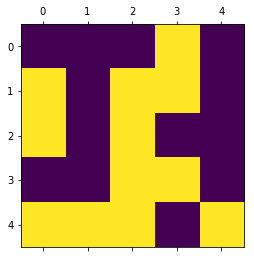

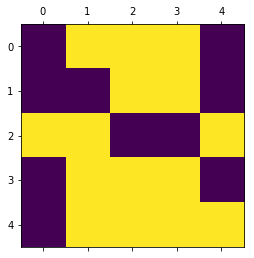

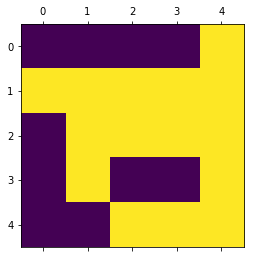

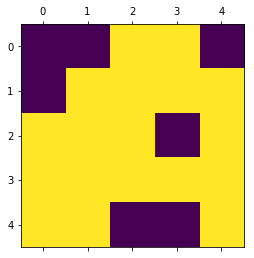

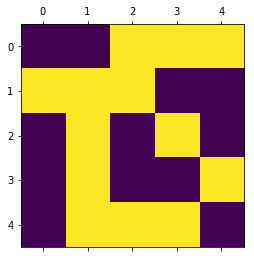

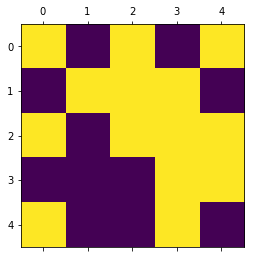

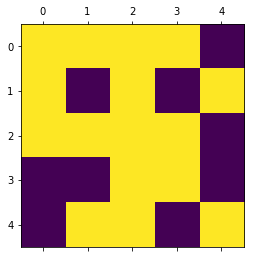

In [4]:
for i in range(len(full)):
    plt.matshow(full[i])

# Problem 4

Implement the continuous Hopfield network.

The derivative of the loss function should be defined as:
$$\frac{\partial G}{\partial w_{km}}=-\frac{1}{2}\sum_{\mu=1}^N(\xi^\mu_k-S^\mu_k)\xi^\mu_m$$
where $S^\mu_k=\tanh(\frac{1}{2}\sum_{j=1}^{N_b}w_{kj}\xi^\mu_j)$.

## Training for 4 patterns

In [5]:
cont_hop4 = ContinuousHopifield(25, print_format=(5,5), synchronous_update=False)

In [6]:
cont_hop4.train(np.copy(train_data[:4]), epochs=80, verbose=True)

Epoch: 0 Loss: 69.31471805599453
Epoch: 1 Loss: 69.31471805599453
Epoch: 2 Loss: 69.31471805599453
Epoch: 3 Loss: 69.31471805599453
Epoch: 4 Loss: 69.31471805599453
Epoch: 5 Loss: 69.31471805599453
Epoch: 6 Loss: 69.31471805599453
Epoch: 7 Loss: 69.31471805599453
Epoch: 8 Loss: 69.31471805599453
Epoch: 9 Loss: 69.31471805599453
Epoch: 10 Loss: 69.31471805599453
Epoch: 11 Loss: 69.31471805599453
Epoch: 12 Loss: 69.31471805599453
Epoch: 13 Loss: 69.31471805599453
Epoch: 14 Loss: 69.31471805599453
Epoch: 15 Loss: 69.31471805599453
Epoch: 16 Loss: 69.31471805599453
Epoch: 17 Loss: 69.31471805599453
Epoch: 18 Loss: 67.2352765143147
Epoch: 19 Loss: 67.2352765143147
Epoch: 20 Loss: 61.690099069835135
Epoch: 21 Loss: 59.61065752815531
Epoch: 22 Loss: 59.61065752815531
Epoch: 23 Loss: 55.45177444479563
Epoch: 24 Loss: 56.83806880591552
Epoch: 25 Loss: 47.13400827807628
Epoch: 26 Loss: 40.20253647247683
Epoch: 27 Loss: 40.20253647247683
Epoch: 28 Loss: 38.123094930796995
Epoch: 29 Loss: 31.88477

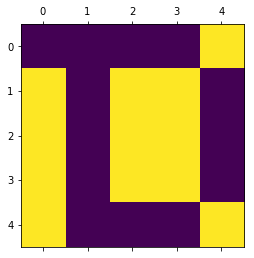

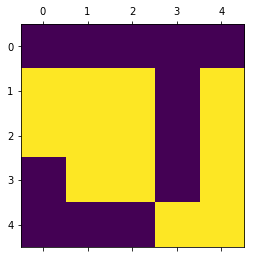

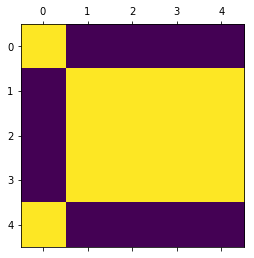

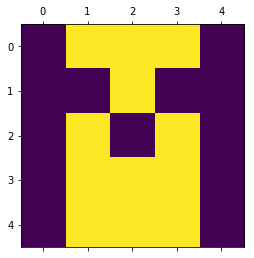

In [7]:
for i in range(4):
  plt.matshow(hopfield.signum(cont_hop4.predict(train_data[i].flatten())).reshape(5,5))

## Training for 5 patterns

In [8]:
cont_hop5 = ContinuousHopifield(25, print_format=(5,5), synchronous_update=False)

In [9]:
cont_hop5.train(train_data[:5], epochs=100, verbose=True)

Epoch: 0 Loss: 86.64339756999317
Epoch: 1 Loss: 86.64339756999317
Epoch: 2 Loss: 86.64339756999317
Epoch: 3 Loss: 86.64339756999317
Epoch: 4 Loss: 86.64339756999317
Epoch: 5 Loss: 86.64339756999317
Epoch: 6 Loss: 86.64339756999317
Epoch: 7 Loss: 86.64339756999317
Epoch: 8 Loss: 86.64339756999317
Epoch: 9 Loss: 86.64339756999317
Epoch: 10 Loss: 86.64339756999317
Epoch: 11 Loss: 86.64339756999317
Epoch: 12 Loss: 86.64339756999317
Epoch: 13 Loss: 86.64339756999317
Epoch: 14 Loss: 86.64339756999317
Epoch: 15 Loss: 85.95025038943322
Epoch: 16 Loss: 85.25710320887327
Epoch: 17 Loss: 85.25710320887327
Epoch: 18 Loss: 85.25710320887327
Epoch: 19 Loss: 83.87080884775338
Epoch: 20 Loss: 83.87080884775338
Epoch: 21 Loss: 74.16674831991415
Epoch: 22 Loss: 69.31471805599453
Epoch: 23 Loss: 60.30380470871525
Epoch: 24 Loss: 52.67918572255584
Epoch: 25 Loss: 49.213449819756114
Epoch: 26 Loss: 47.13400827807628
Epoch: 27 Loss: 40.89568365303677
Epoch: 28 Loss: 38.816242111356935
Epoch: 29 Loss: 39.509

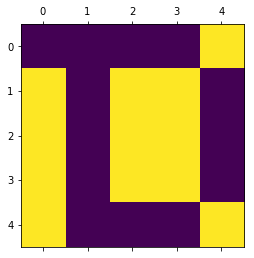

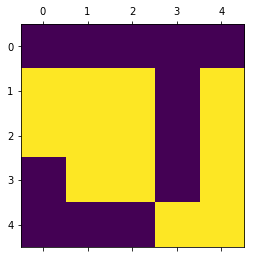

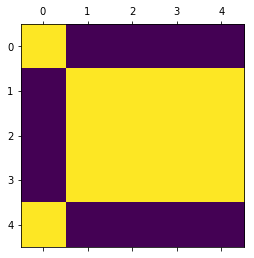

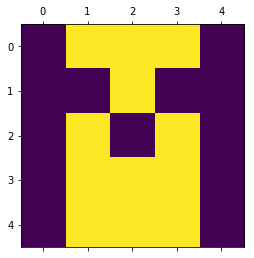

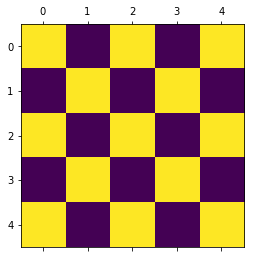

In [10]:
for i in range(5):
  plt.matshow(hopfield.signum(cont_hop5.predict(train_data[i].flatten())).reshape(5,5))

## Training for 6 patterns

In [11]:
cont_hop6 = ContinuousHopifield(25, print_format=(5,5), synchronous_update=False)

In [12]:
cont_hop6.train(train_data[:6], tolerance=1e-5, verbose=True)

Epoch: 1 Loss: 103.9720770839918
Epoch: 2 Loss: 103.9720770839918
Epoch: 3 Loss: 103.9720770839918
Epoch: 4 Loss: 103.9720770839918
Epoch: 5 Loss: 103.9720770839918
Epoch: 6 Loss: 103.9720770839918
Epoch: 7 Loss: 103.9720770839918
Epoch: 8 Loss: 103.9720770839918
Epoch: 9 Loss: 103.9720770839918
Epoch: 10 Loss: 103.9720770839918
Epoch: 11 Loss: 103.27892990343187
Epoch: 12 Loss: 102.58578272287193
Epoch: 13 Loss: 101.89263554231198
Epoch: 14 Loss: 101.19948836175203
Epoch: 15 Loss: 101.19948836175203
Epoch: 16 Loss: 98.42689963951224
Epoch: 17 Loss: 92.18857501447273
Epoch: 18 Loss: 74.85989550047408
Epoch: 19 Loss: 75.55304268103403
Epoch: 20 Loss: 70.00786523655447
Epoch: 21 Loss: 65.15583497263485
Epoch: 22 Loss: 54.75862726423567
Epoch: 23 Loss: 64.4626877920749
Epoch: 24 Loss: 50.599744180876
Epoch: 25 Loss: 51.986038541995896
Epoch: 26 Loss: 54.06548008367572
Epoch: 27 Loss: 55.451774444795625
Epoch: 28 Loss: 39.509389291916875
Epoch: 29 Loss: 40.89568365303677
Epoch: 30 Loss: 42

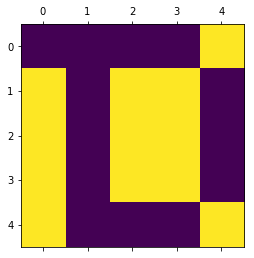

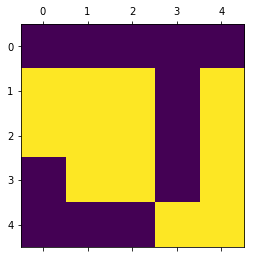

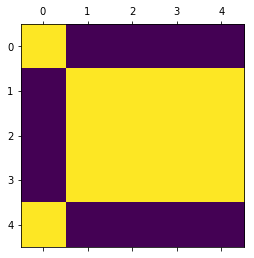

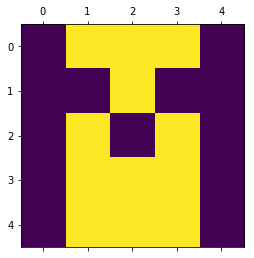

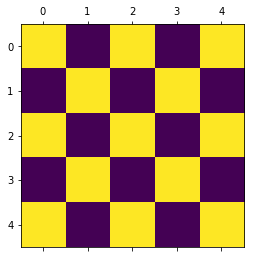

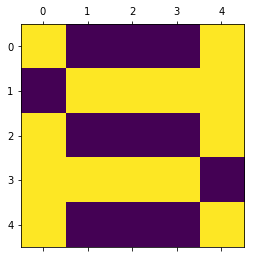

In [13]:
for i in range(6):
  plt.matshow(hopfield.signum(cont_hop6.predict(train_data[i].flatten())).reshape(5,5))

## Testing with 4 learning patterns

We choose the network trained with 4 patterns to see how does the convergence work here.

Pattern no. 0


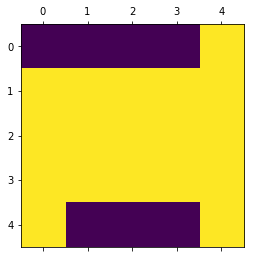

Pattern no. 1


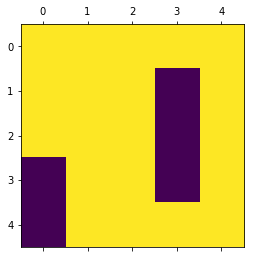

Pattern no. 2


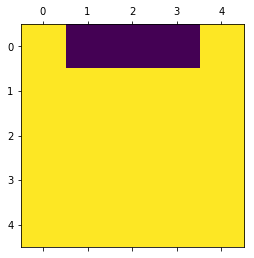

Pattern no. 3


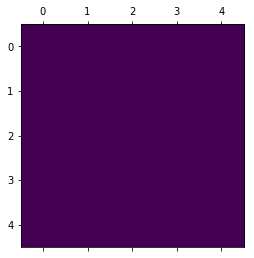

Pattern no. 4


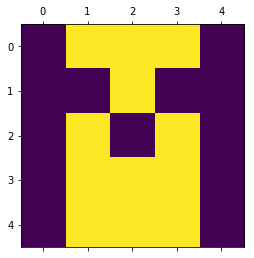

Pattern no. 5


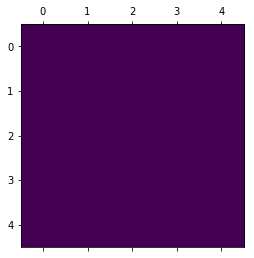

Pattern no. 6


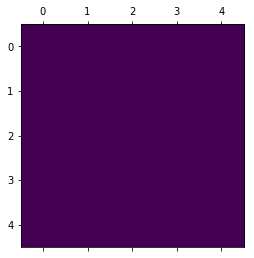

Pattern no. 7


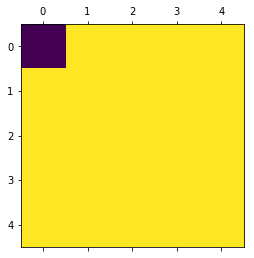

Pattern no. 8


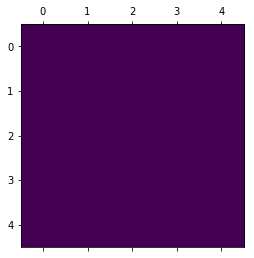

Pattern no. 9


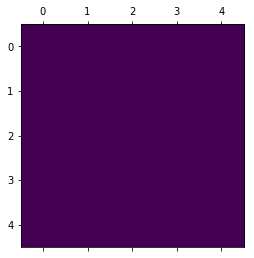

Pattern no. 10


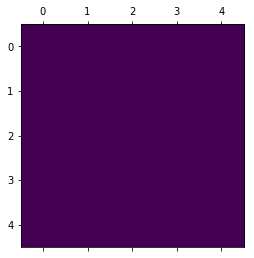

Pattern no. 11


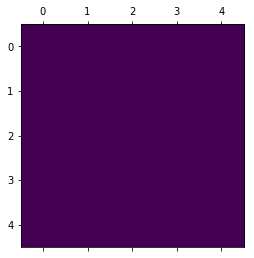

Pattern no. 12


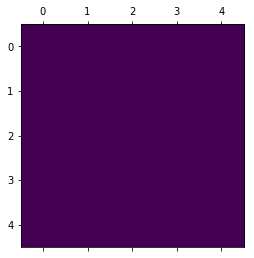

In [14]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop4.predict(test[i].flatten())).reshape(5,5))
  plt.show()

And we can see, if the patterns converge in more update steps.

Pattern no. 0


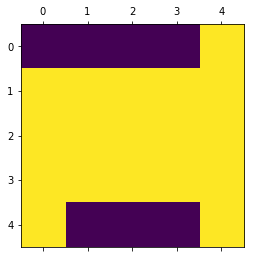

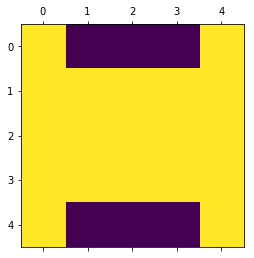

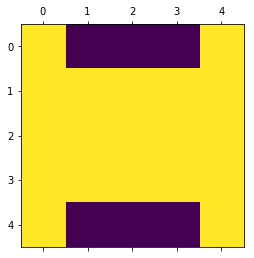

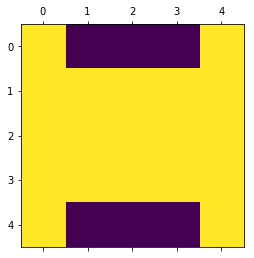

******************************
Pattern no. 1


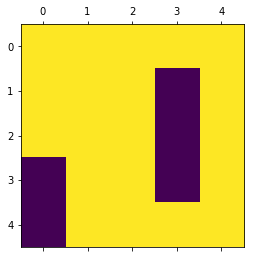

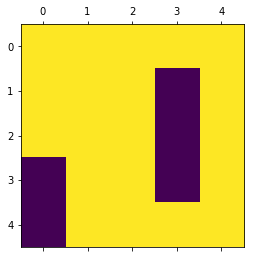

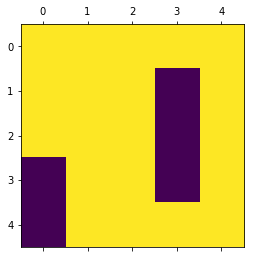

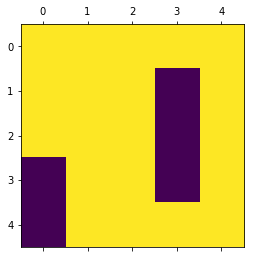

******************************
Pattern no. 2


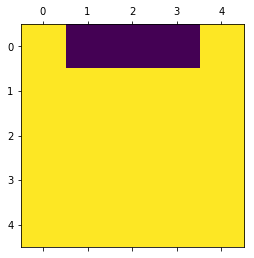

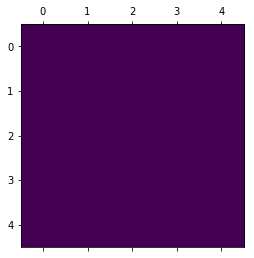

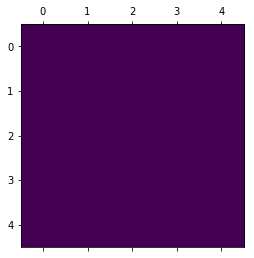

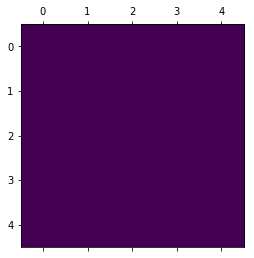

******************************
Pattern no. 3


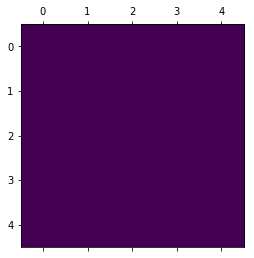

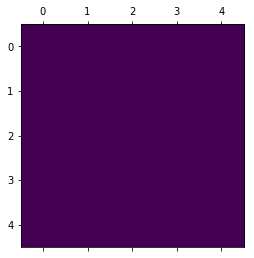

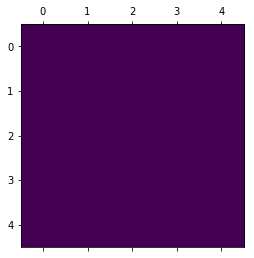

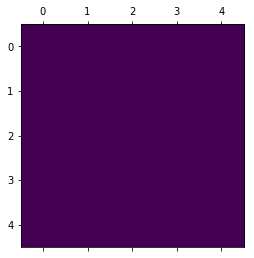

******************************
Pattern no. 4


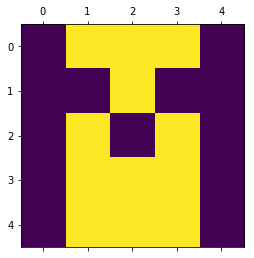

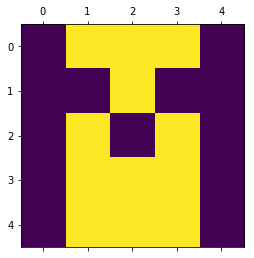

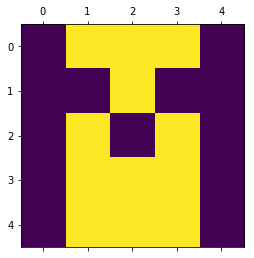

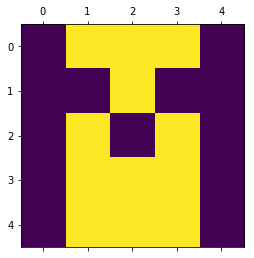

******************************
Pattern no. 5


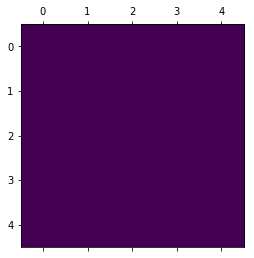

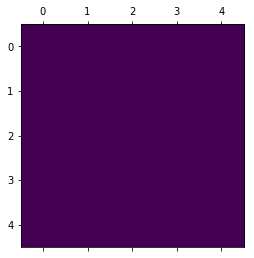

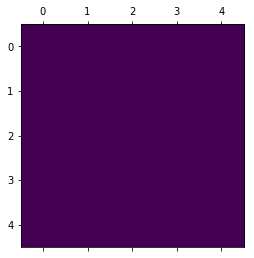

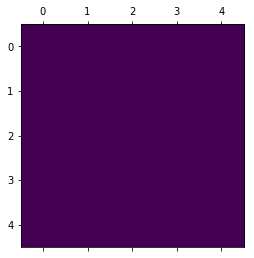

******************************
Pattern no. 6


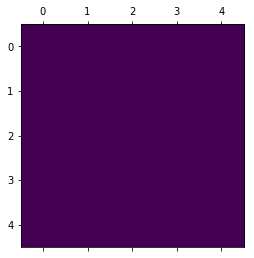

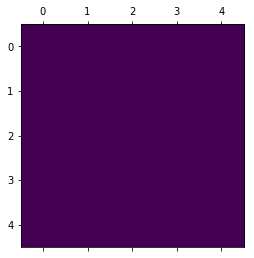

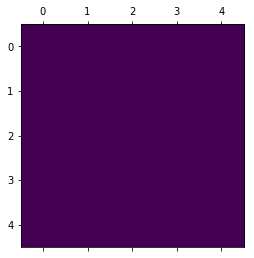

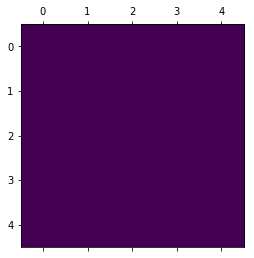

******************************
Pattern no. 7


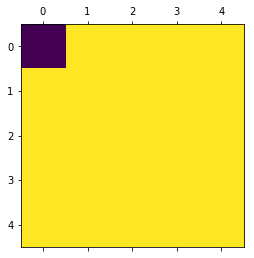

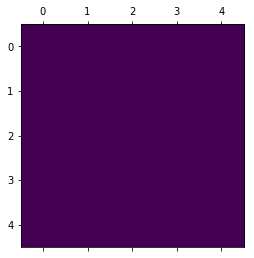

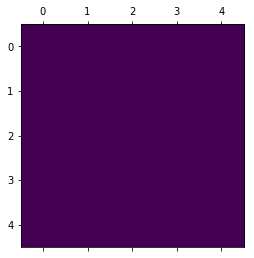

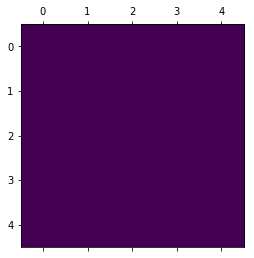

******************************
Pattern no. 8


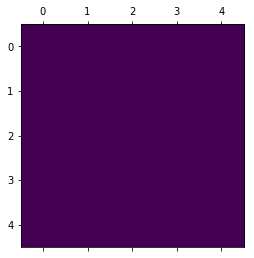

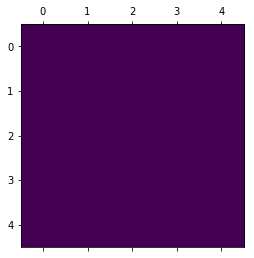

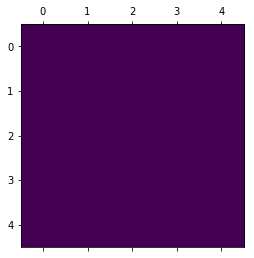

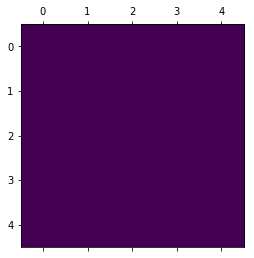

******************************
Pattern no. 9


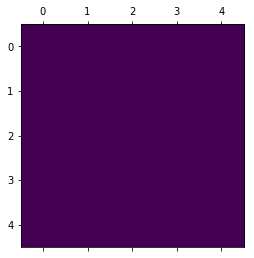

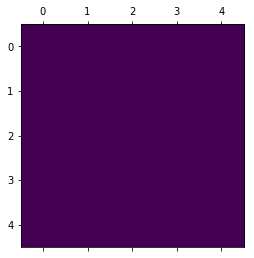

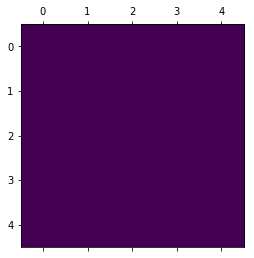

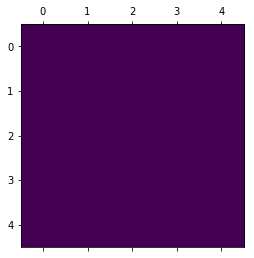

******************************
Pattern no. 10


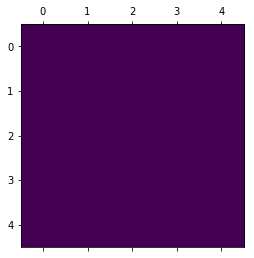

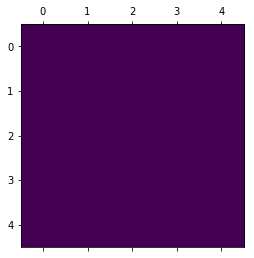

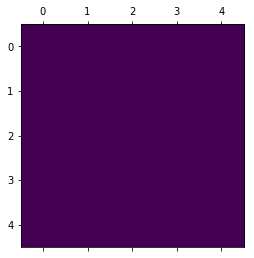

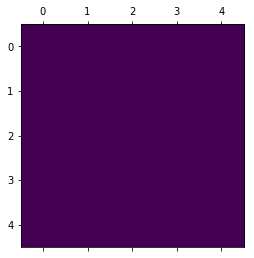

******************************
Pattern no. 11


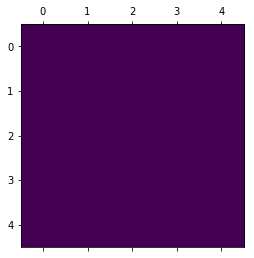

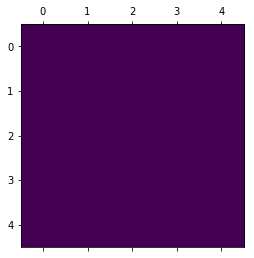

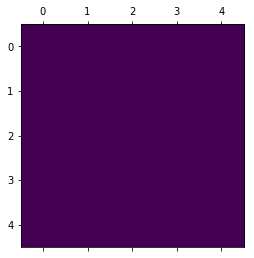

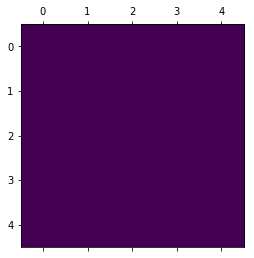

******************************
Pattern no. 12


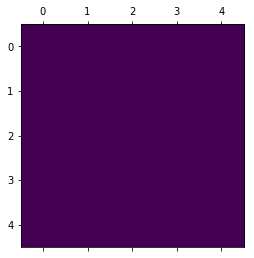

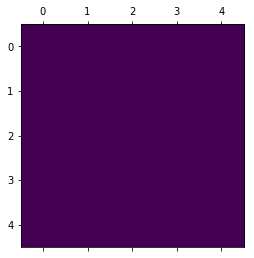

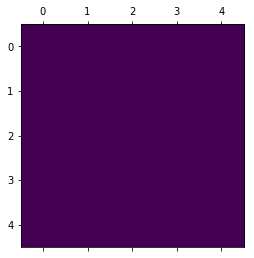

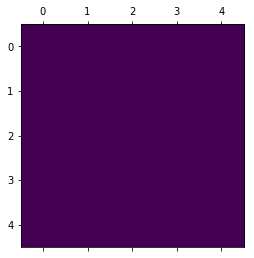

******************************


In [15]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
#   for j in range(5):
  plt.matshow(hopfield.signum(cont_hop4.predict(test[i].flatten())).reshape(5,5))
  plt.show()
  for j in range(3):
    plt.matshow(hopfield.signum(cont_hop4.predict()).reshape(5,5))
    plt.show()
  print('*'*30)

## Testing with 5 learning patterns

We choose the network trained with 5 patterns to see how does the convergence work here.

Pattern no. 0


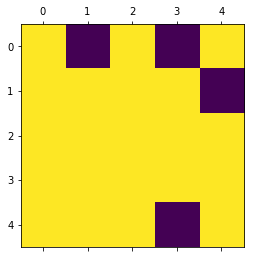

Pattern no. 1


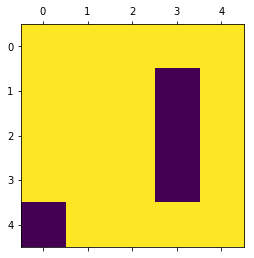

Pattern no. 2


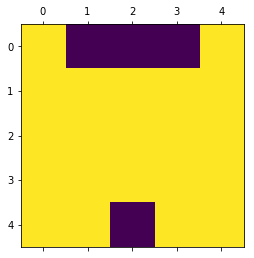

Pattern no. 3


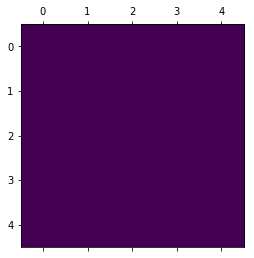

Pattern no. 4


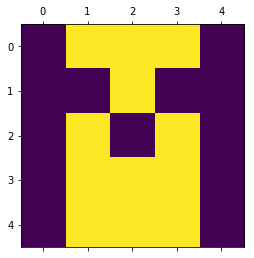

Pattern no. 5


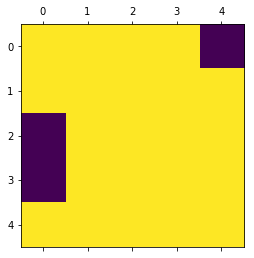

Pattern no. 6


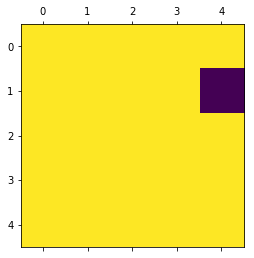

Pattern no. 7


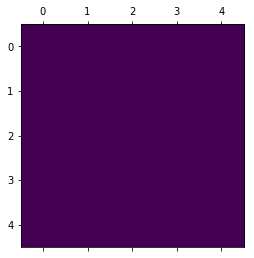

Pattern no. 8


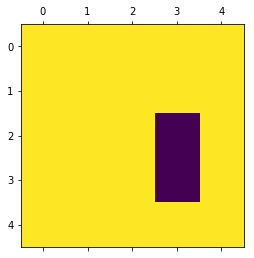

Pattern no. 9


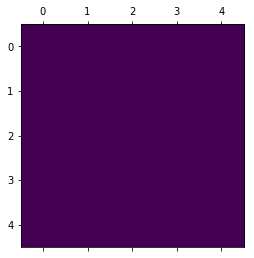

Pattern no. 10


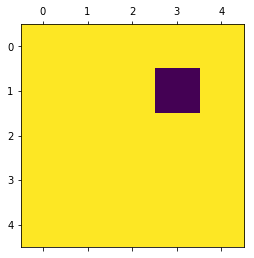

Pattern no. 11


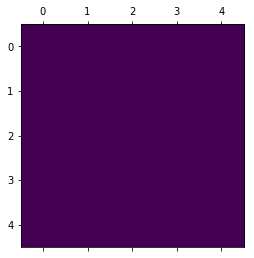

Pattern no. 12


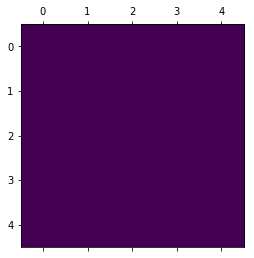

In [16]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop5.predict(test[i].flatten())).reshape(5,5))
  plt.show()

And we can see, if the patterns converge in more update steps.

Pattern no. 0


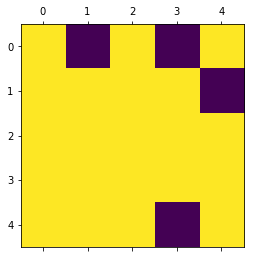

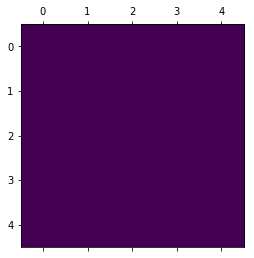

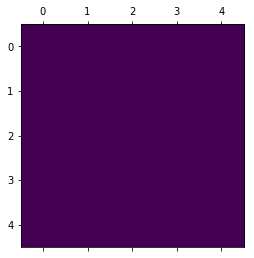

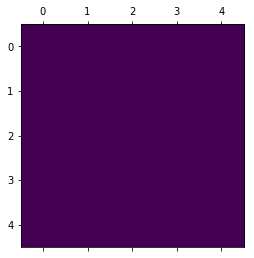

******************************
Pattern no. 1


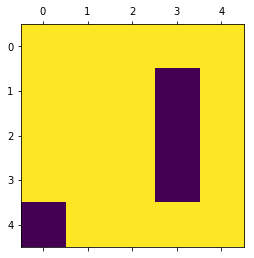

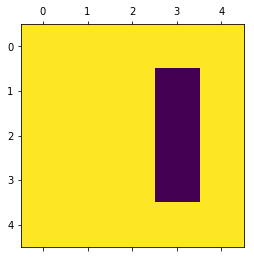

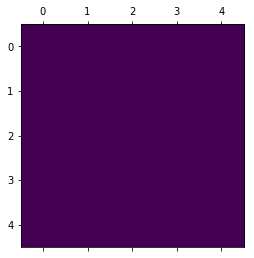

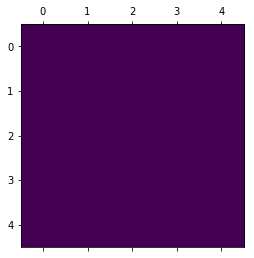

******************************
Pattern no. 2


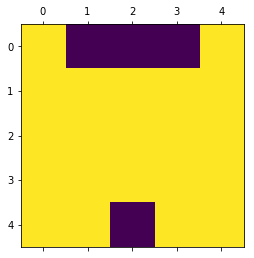

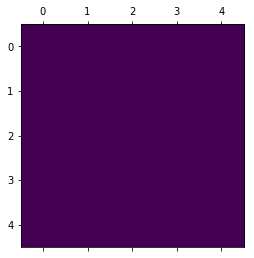

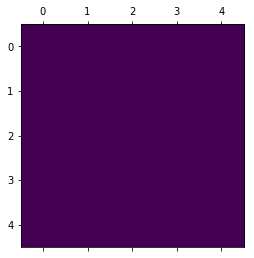

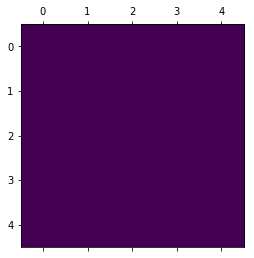

******************************
Pattern no. 3


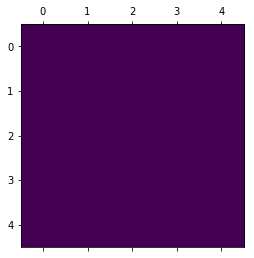

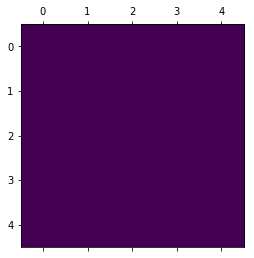

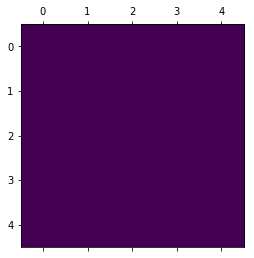

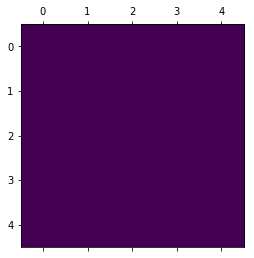

******************************
Pattern no. 4


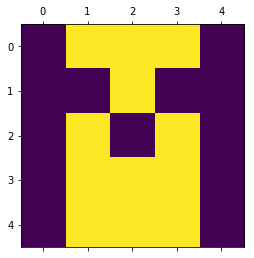

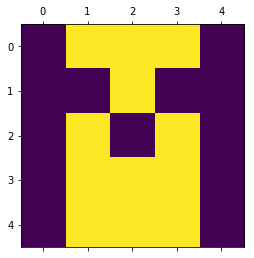

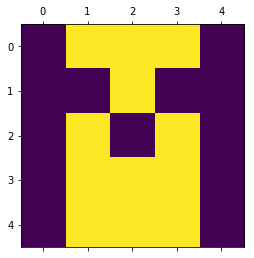

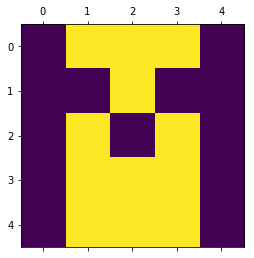

******************************
Pattern no. 5


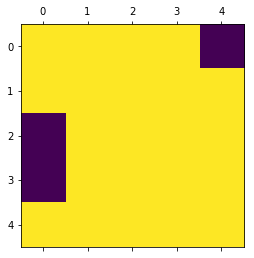

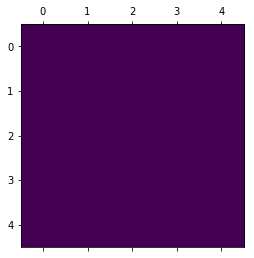

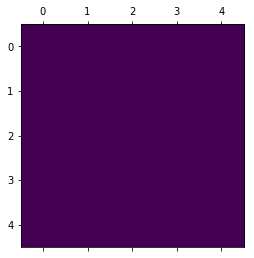

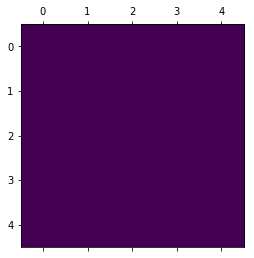

******************************
Pattern no. 6


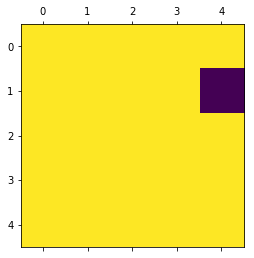

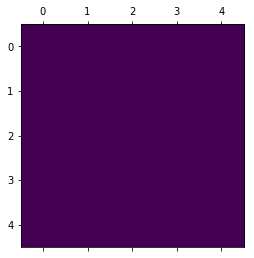

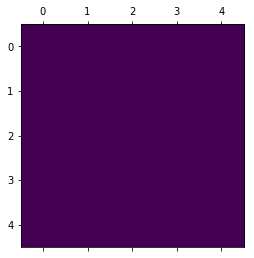

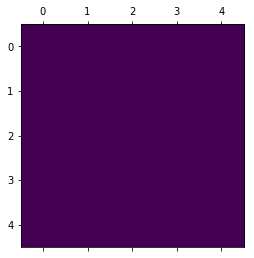

******************************
Pattern no. 7


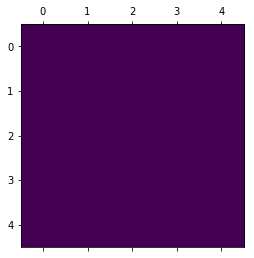

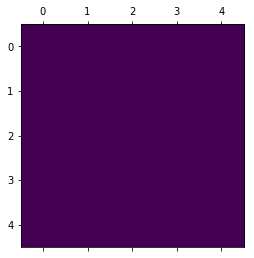

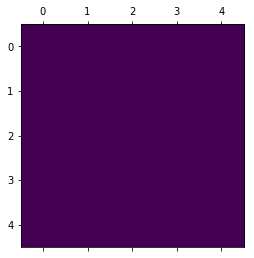

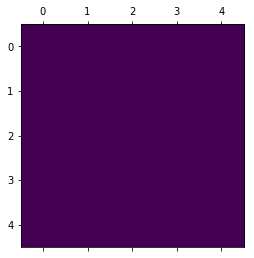

******************************
Pattern no. 8


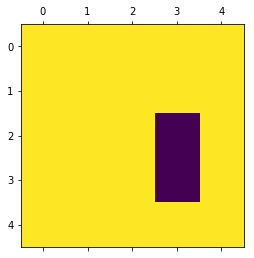

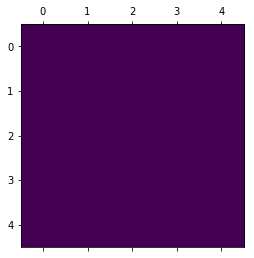

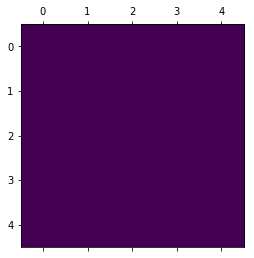

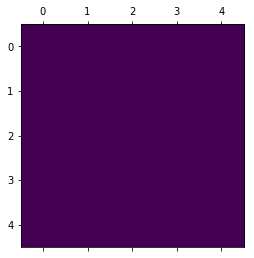

******************************
Pattern no. 9


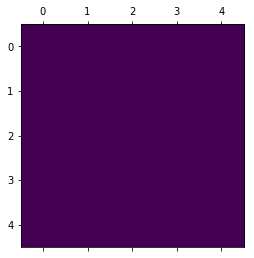

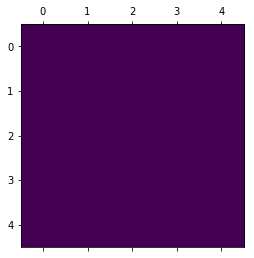

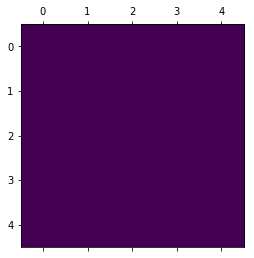

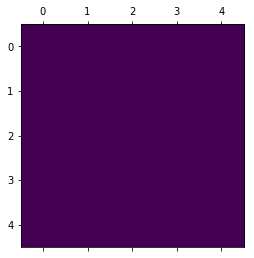

******************************
Pattern no. 10


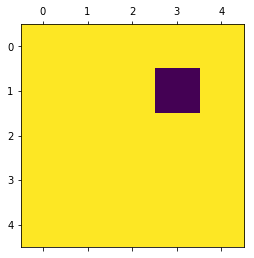

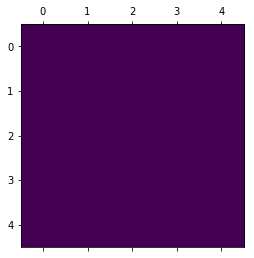

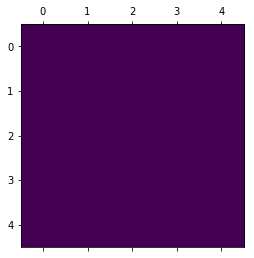

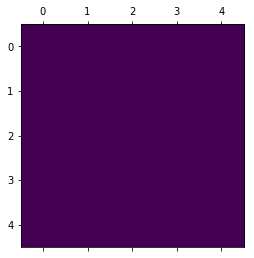

******************************
Pattern no. 11


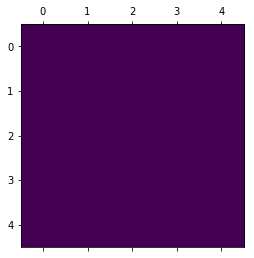

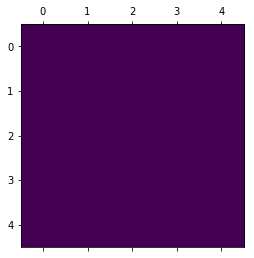

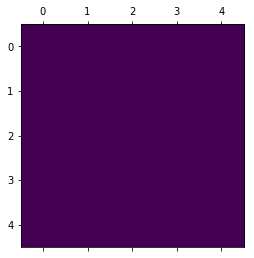

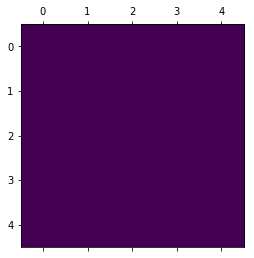

******************************
Pattern no. 12


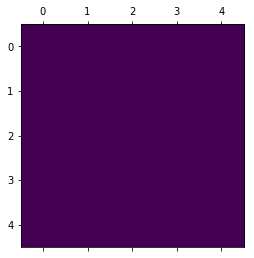

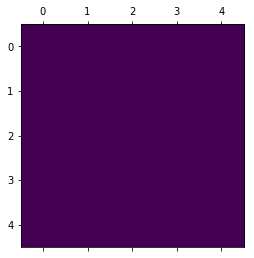

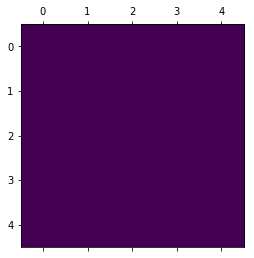

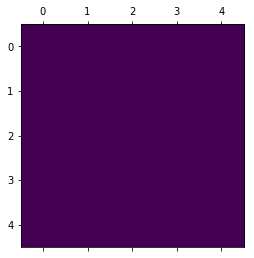

******************************


In [17]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop5.predict(test[i].flatten())).reshape(5,5))
  plt.show()
  for j in range(3):
    plt.matshow(hopfield.signum(cont_hop5.predict()).reshape(5,5))
    plt.show()
  print('*'*30)

## Testing with 6 learning patterns

We choose the network trained with 6 patterns to see how does the convergence work here.

Pattern no. 0


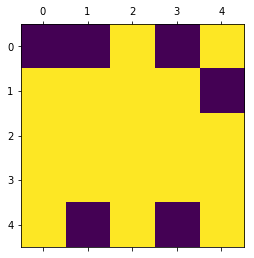

Pattern no. 1


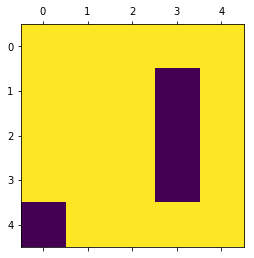

Pattern no. 2


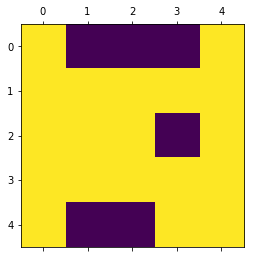

Pattern no. 3


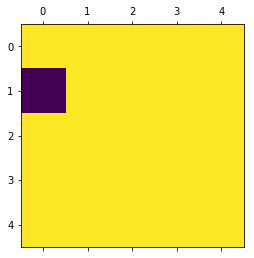

Pattern no. 4


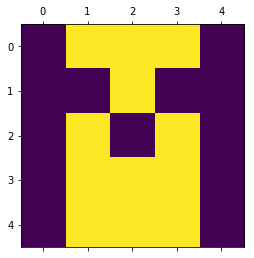

Pattern no. 5


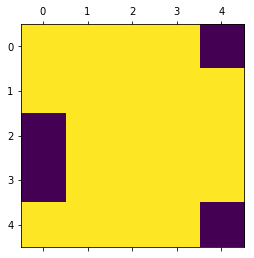

Pattern no. 6


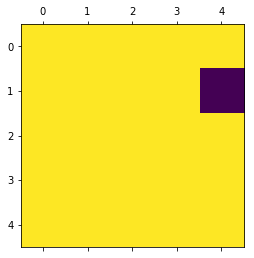

Pattern no. 7


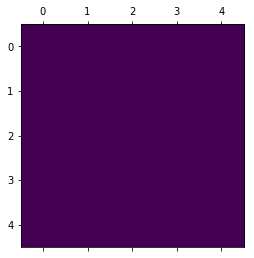

Pattern no. 8


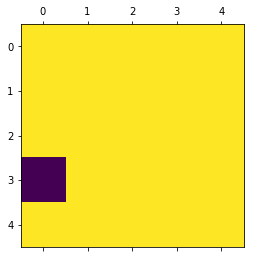

Pattern no. 9


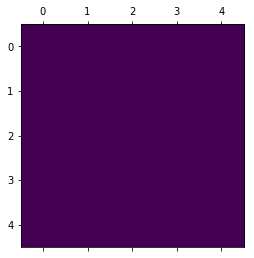

Pattern no. 10


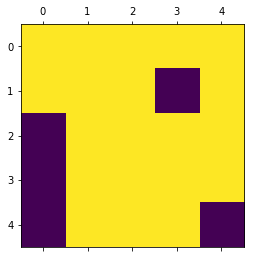

Pattern no. 11


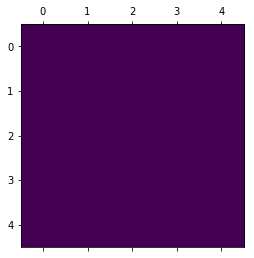

Pattern no. 12


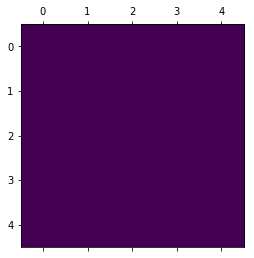

In [18]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop6.predict(test[i].flatten())).reshape(5,5))
  plt.show()

And we can see, if the patterns converge in more update steps.

Pattern no. 0


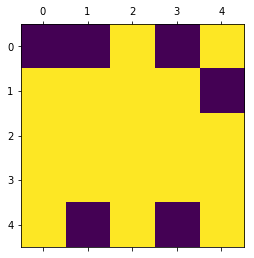

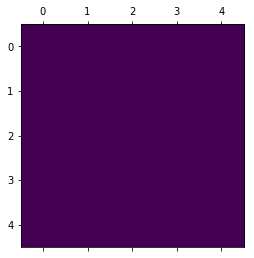

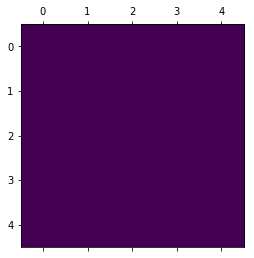

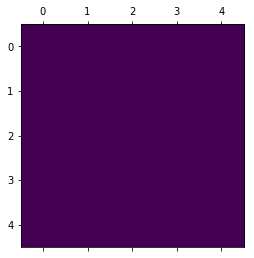

******************************
Pattern no. 1


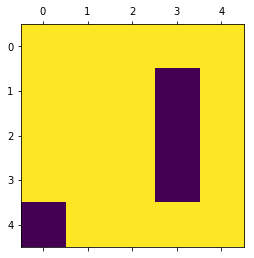

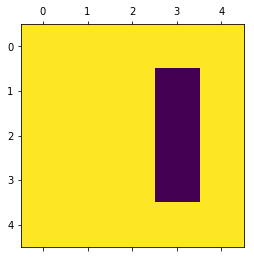

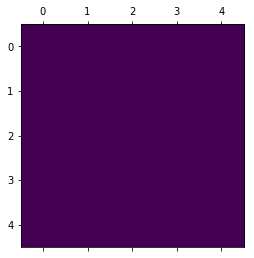

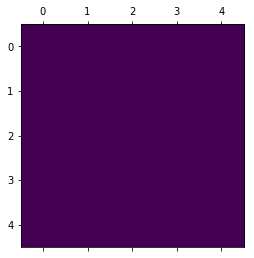

******************************
Pattern no. 2


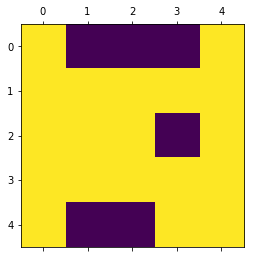

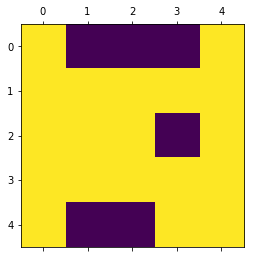

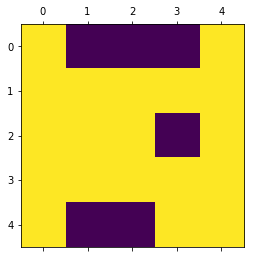

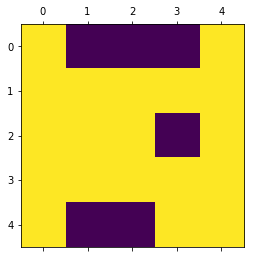

******************************
Pattern no. 3


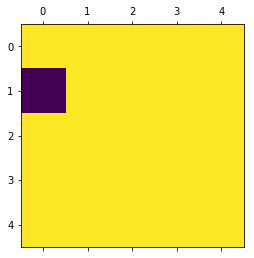

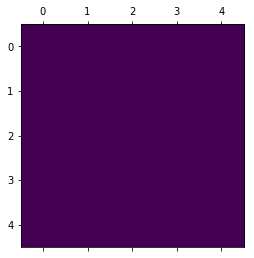

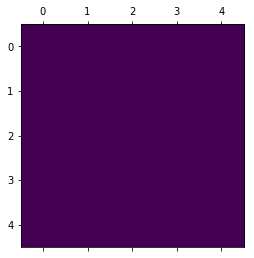

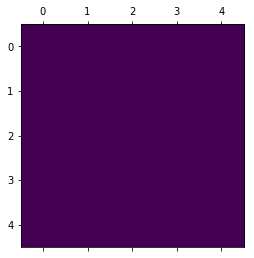

******************************
Pattern no. 4


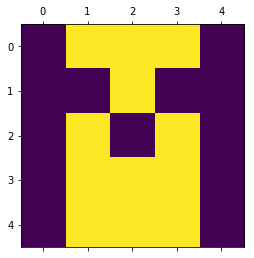

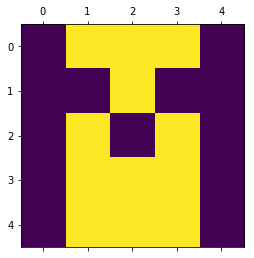

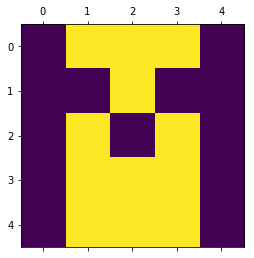

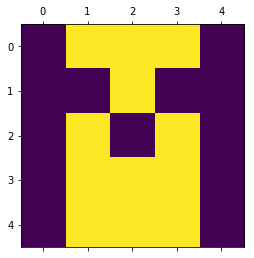

******************************
Pattern no. 5


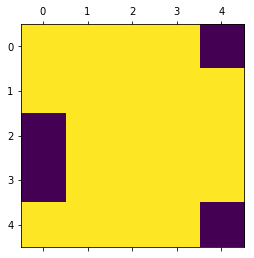

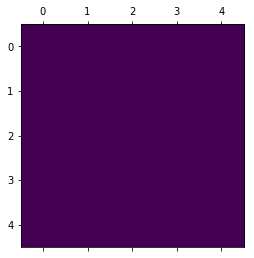

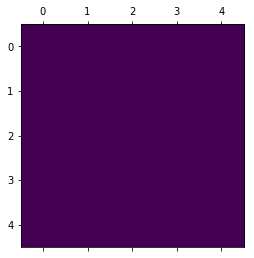

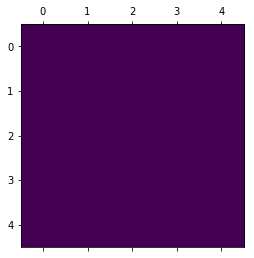

******************************
Pattern no. 6


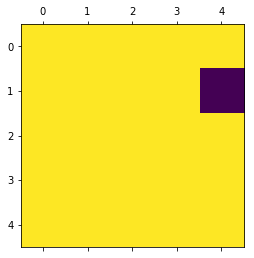

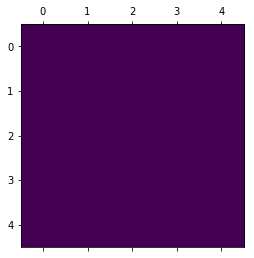

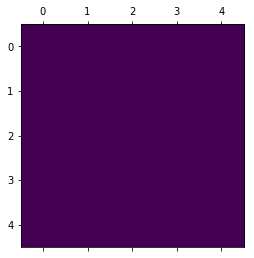

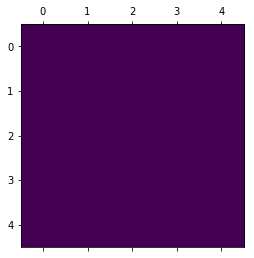

******************************
Pattern no. 7


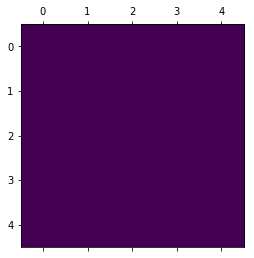

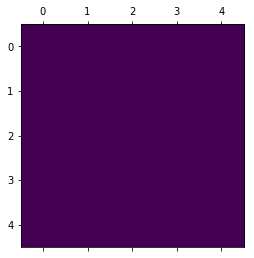

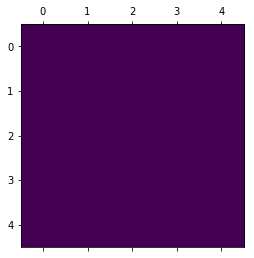

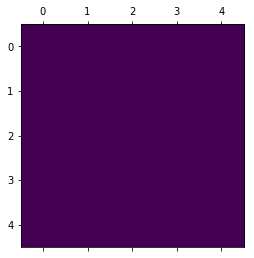

******************************
Pattern no. 8


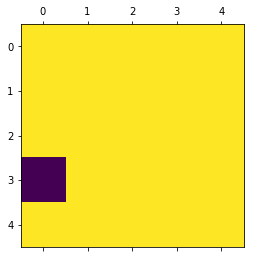

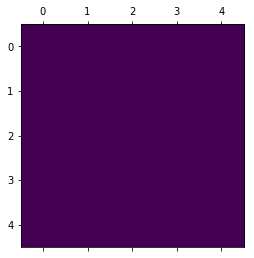

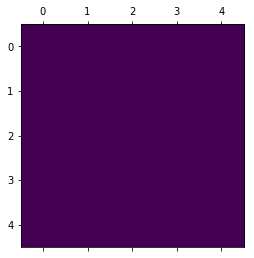

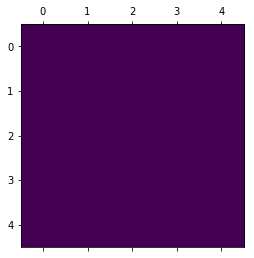

******************************
Pattern no. 9


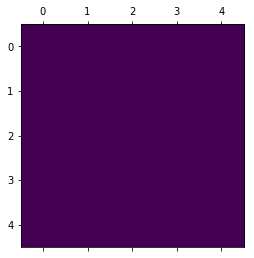

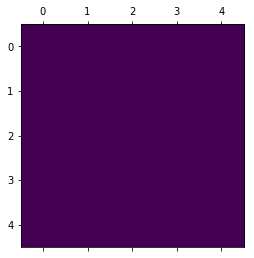

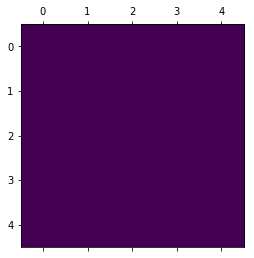

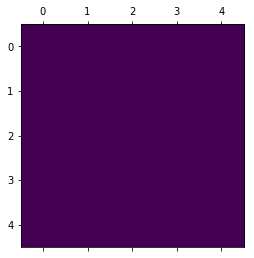

******************************
Pattern no. 10


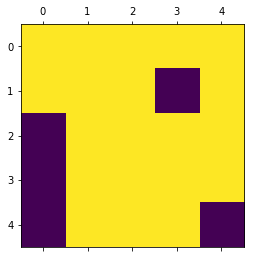

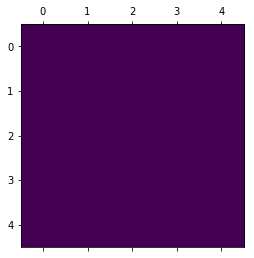

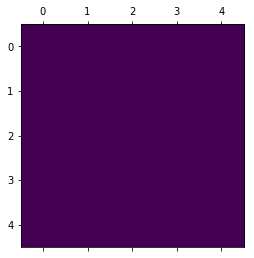

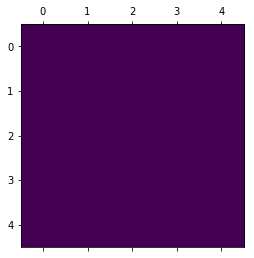

******************************
Pattern no. 11


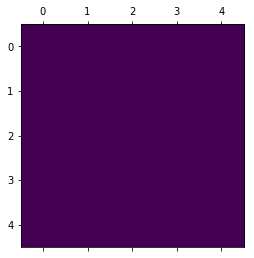

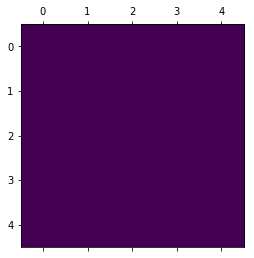

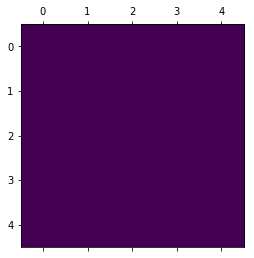

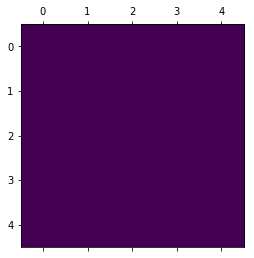

******************************
Pattern no. 12


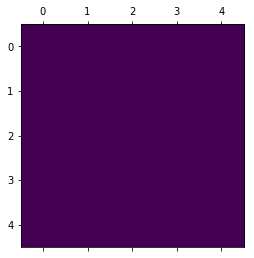

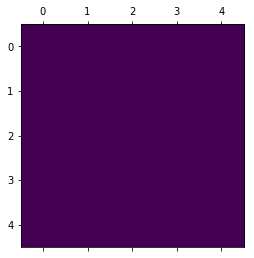

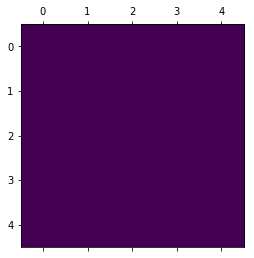

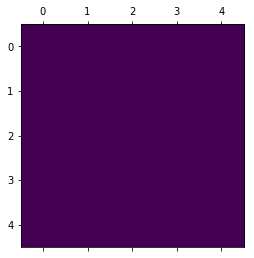

******************************


In [19]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop6.predict(test[i].flatten())).reshape(5,5))
  plt.show()
  for j in range(3):
    plt.matshow(hopfield.signum(cont_hop6.predict()).reshape(5,5))
    plt.show()
  print('*'*30)